In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set(style="whitegrid")
df = pd.read_csv('events.csv',low_memory = False)
df.tail()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,8512.0,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()
df.isnull().sum()
total_event = df['event'].size
total_event

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

1011288

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
#En el mes 6 hay datos solo hasta el día 15

In [9]:
#Me limito a hacer un analisis solo con meses porque hay un solo año
months_visits = df[(df['event'] == 'visited site') | (df['event'] == 'ad campaign hit') | (df['event'] == 'search engine hit')]
months_visits = months_visits['month'].value_counts().to_frame()
months_visits = months_visits.sort_index(ascending= False)
cantidad_visitas_mes = months_visits["month"]
cant = months_visits['month'].sum()
months_visits['month'] = months_visits['month'].apply(lambda x: ((x)/cant)*100)
cantidad_visitas_mes


6     60765
5    102504
4     29179
3     17406
2      6468
1      4840
Name: month, dtype: int64

Text(0,0.5,'Cantidad de visitas')

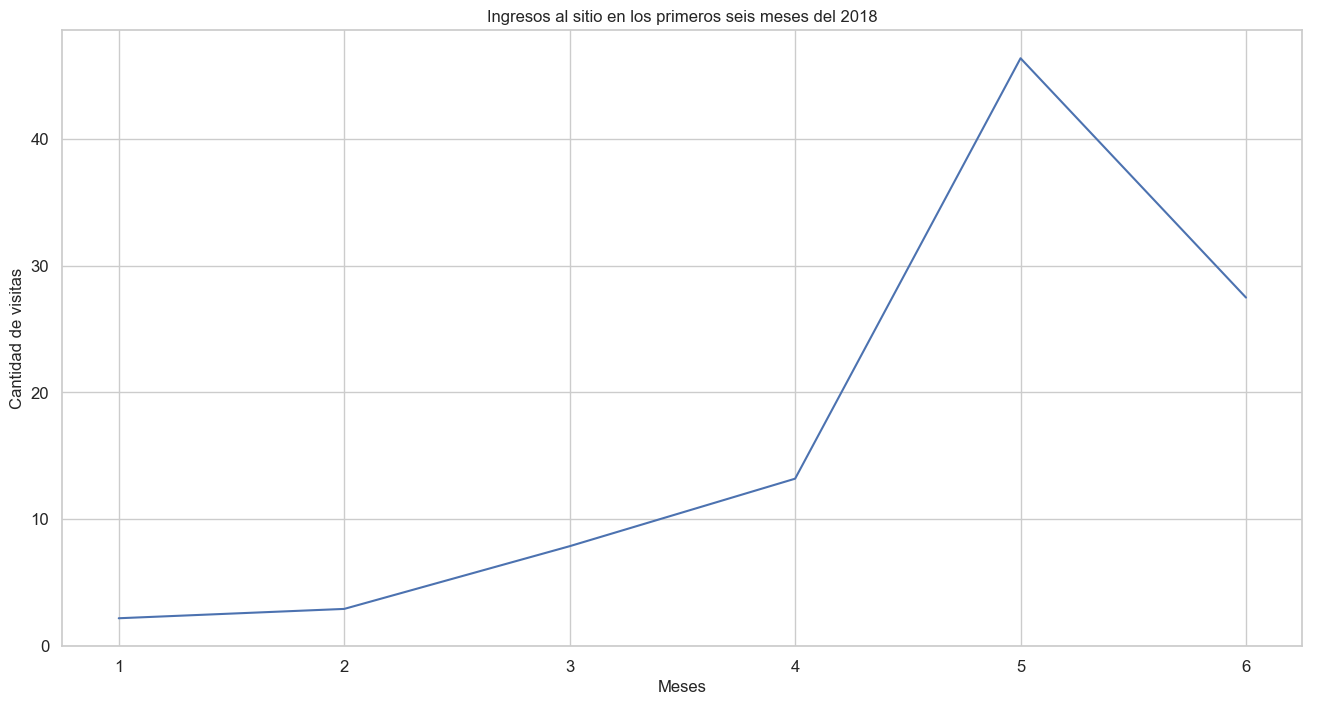

In [10]:
months_visits.plot(kind = 'line', figsize = (16, 8), title = 'Ingresos al sitio en los primeros seis meses del 2018', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Cantidad de visitas", fontsize = 12)

In [11]:
viewed = df[(df['event'] == 'viewed product')]
viewed = viewed['month'].value_counts()
viewed = viewed.sort_index(ascending = False).to_frame()
viewed['month'] = viewed['month'].apply(lambda x: (x/viewed['month'].sum()) * 100)
viewed

,month
6,27.797199
5,47.891313
4,12.467411
3,7.499277
2,2.671426
1,1.673375


Text(0,0.5,'Cantidad de visitas')

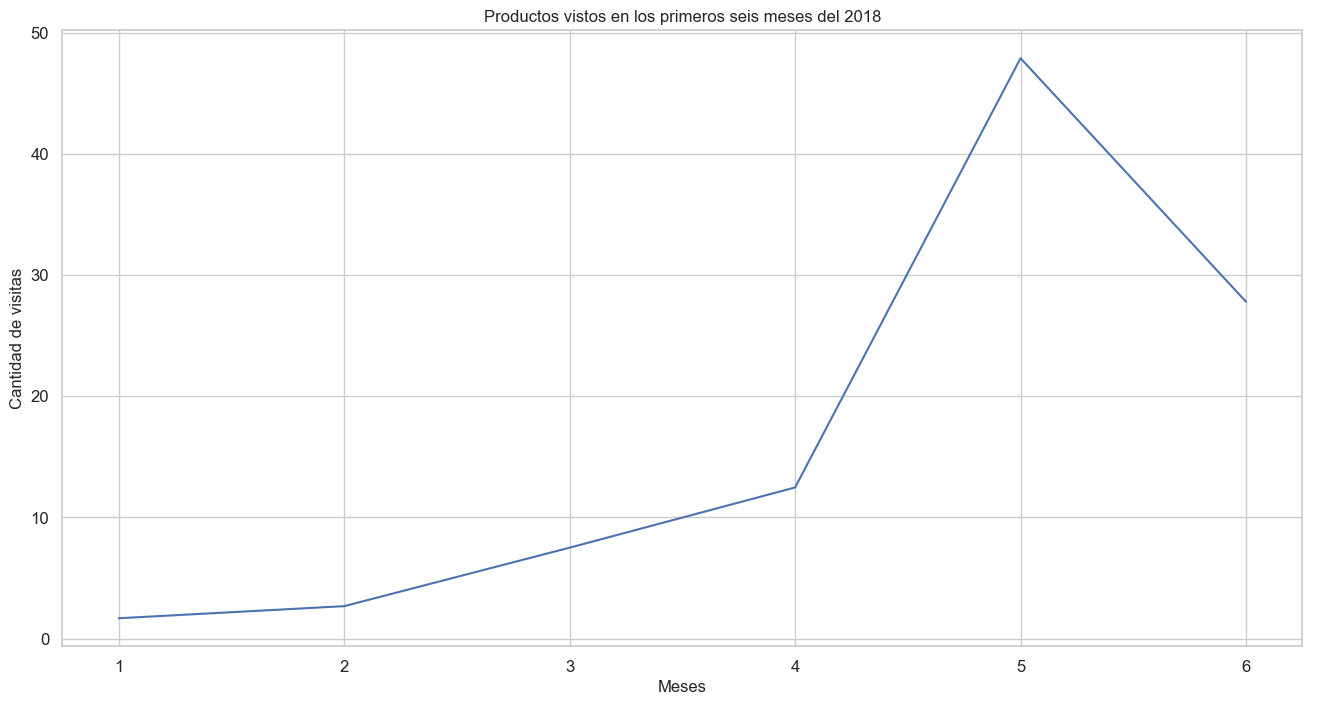

In [12]:
viewed.plot(kind = 'line', figsize = (16, 8), title = 'Productos vistos en los primeros seis meses del 2018', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Cantidad de visitas", fontsize = 12)

In [13]:
ch_vs_co = df.loc[(df['event'] == 'checkout') | (df['event'] == 'conversion'), ['event']]
ch_vs_co = ch_vs_co['event'].value_counts().to_frame()
ch_vs_co

,event
checkout,33735
conversion,1172


Text(0,0.5,'Frecuencia')

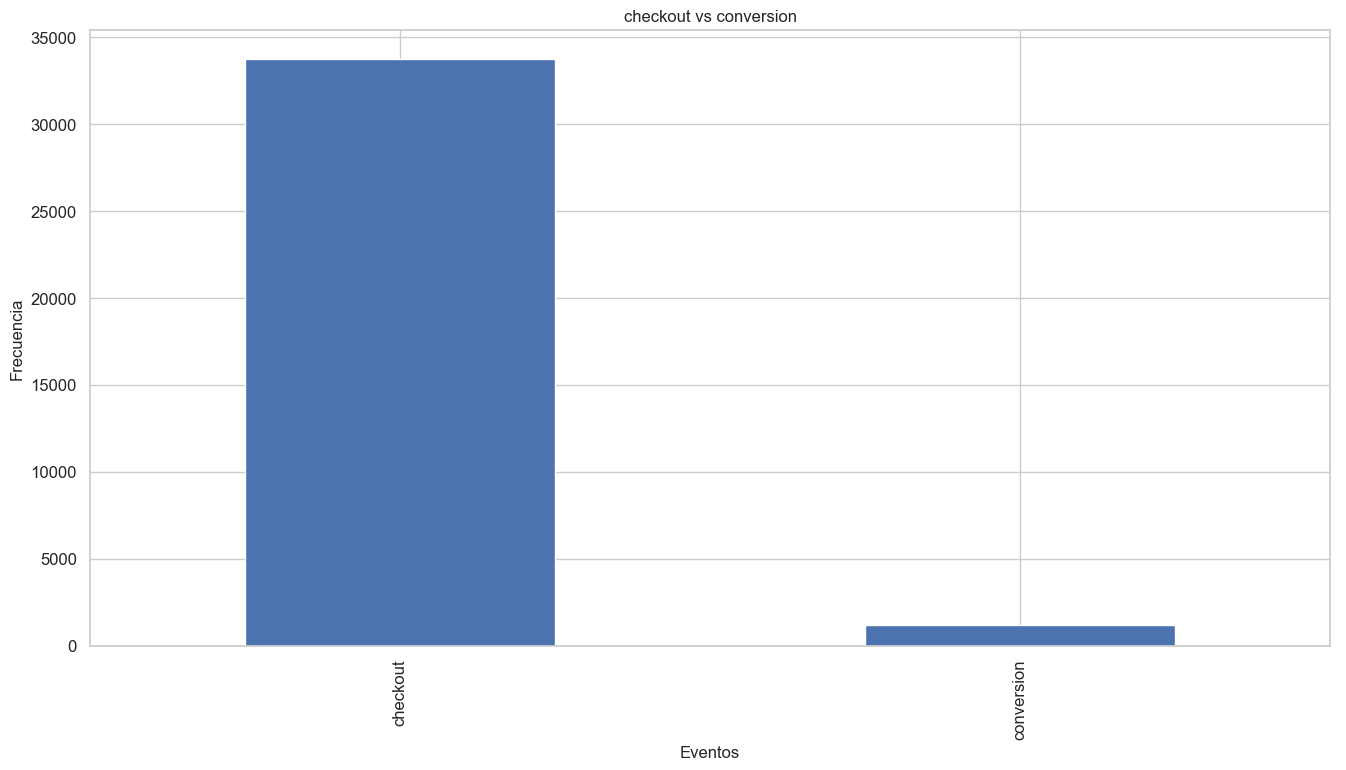

In [14]:
ch_vs_co.plot(kind = 'bar', figsize = (16, 8), title = 'checkout vs conversion', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Eventos",fontsize = 12)
ax.set_ylabel("Frecuencia", fontsize = 12)

In [15]:
sales = df.loc[ (df['event'] == 'conversion'), ['event', 'month']]
sales = sales.groupby('month').size().sort_index(ascending = False).rename('Compras')
sales = sales.apply(lambda x: x/sales.sum() * 100)

In [25]:
checkout = df.loc[(df['event'] == 'checkout'), ['event', 'month']]
checkout = checkout.groupby('month').size().sort_index(ascending = False).rename('Checkout')
checkout = checkout.apply(lambda x: x/checkout.sum() * 100)

Text(0,0.5,'Ventas')

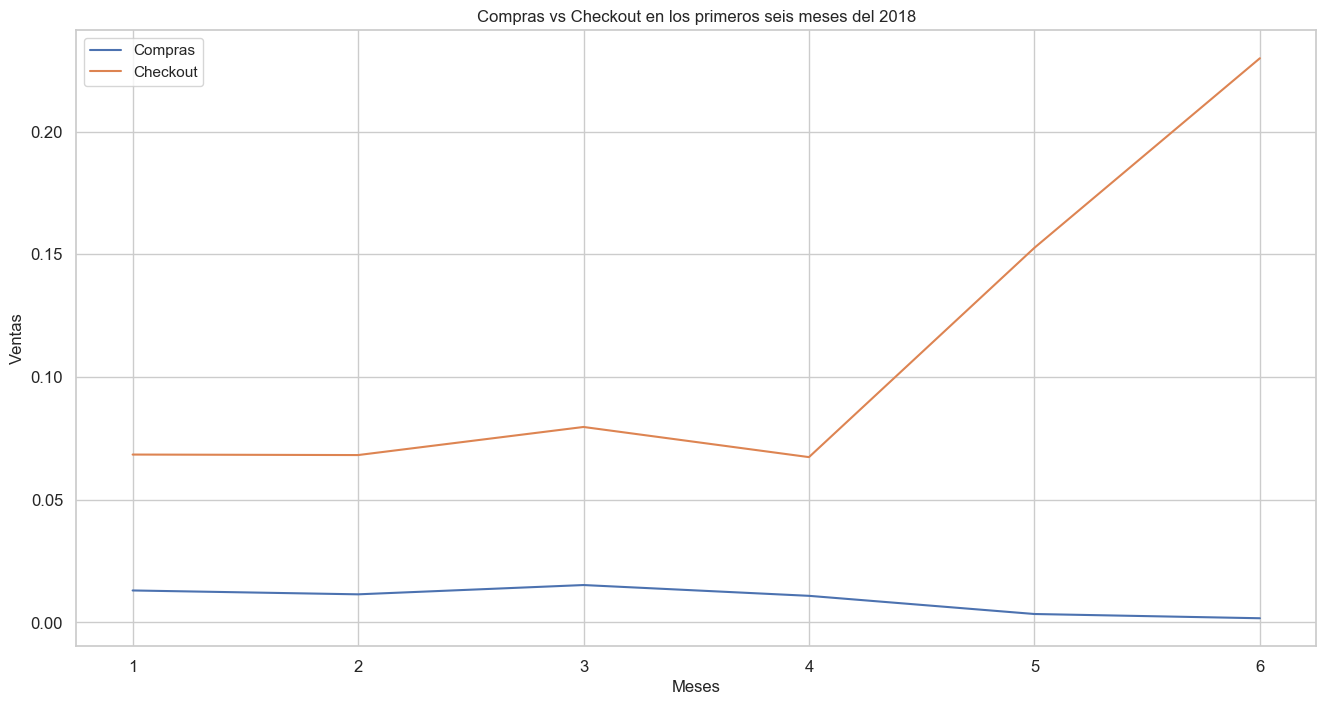

In [26]:
#modeificacion tito
sales = df.loc[ (df['event'] == 'conversion'), ['event', 'month']]
sales = sales.groupby('month').size().sort_index(ascending = False).rename('Compras')

checkout = df.loc[(df['event'] == 'checkout'), ['event', 'month']]
checkout = checkout.groupby('month').size().sort_index(ascending = False).rename('Checkout')

checkout = checkout/cantidad_visitas_mes.rename('Checkout')

sales = sales/cantidad_visitas_mes.rename('Compras')

sales.plot(kind = 'line', figsize = (16, 8), title = 'Compras vs Checkout en los primeros seis meses del 2018', legend = True, fontsize = 12)
checkout.plot(kind = 'line', figsize = (16, 8), title = 'Compras vs Checkout en los primeros seis meses del 2018', legend = True, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Ventas", fontsize = 12)

Text(0,0.5,'Ventas')

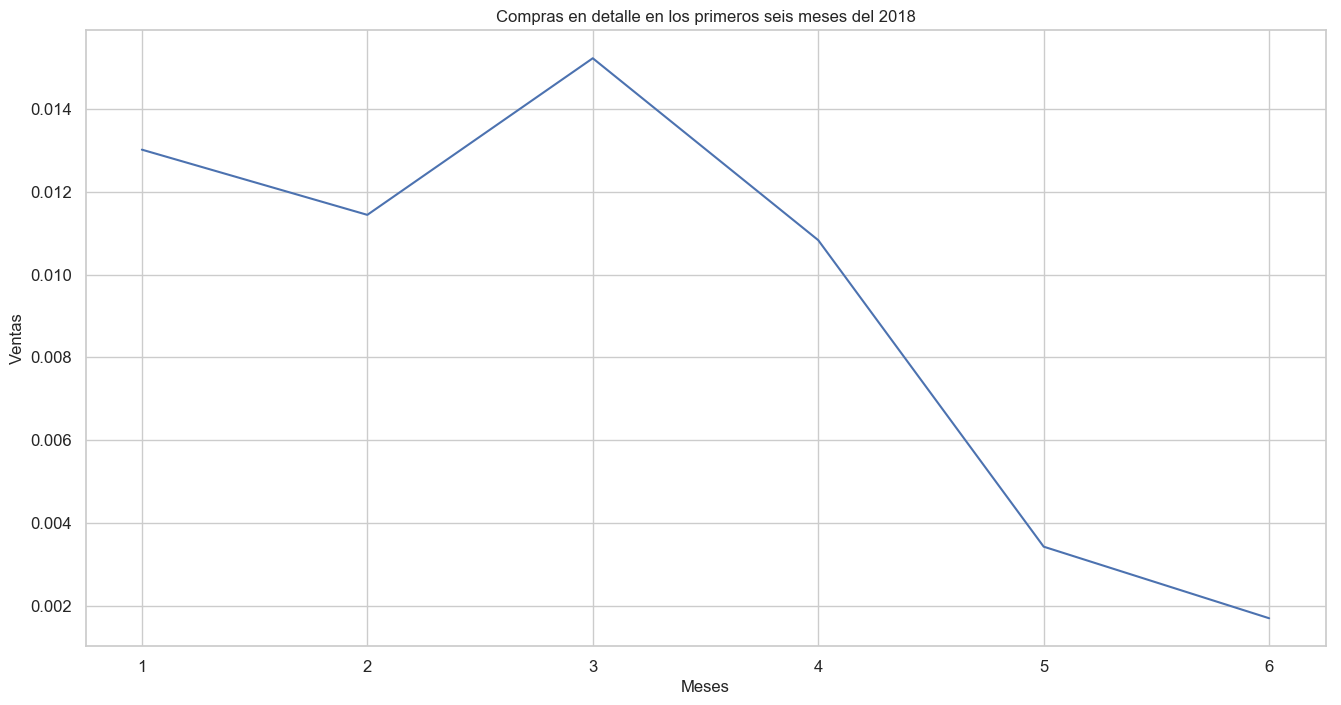

In [27]:
sales.plot(kind = 'line', figsize = (16, 8), title = 'Compras en detalle en los primeros seis meses del 2018', legend = False, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Ventas", fontsize = 12)

In [28]:
df.groupby('new_vs_returning')['event'].value_counts()

new_vs_returning  event       
New               visited site    26898
Returning         visited site    60480
Name: event, dtype: int64

In [36]:
new_users = df[ (df['new_vs_returning'] == 'New')].drop_duplicates('person')
new_users = new_users['month'].value_counts().sort_index(ascending = False)
new_users.rename('Nuevos usuarios', inplace = True)
new_users = new_users/cantidad_visitas_mes.rename('Nuevos usuarios')

In [35]:
ret_users = df[ (df['new_vs_returning'] == 'Returning')].drop_duplicates('person')
ret_users = ret_users['month'].value_counts().sort_index(ascending = False)
ret_users.rename('Usuarios que regresan', inplace = True)
ret_users = ret_users/cantidad_visitas_mes.rename('Usuarios que regresan')

Text(0,0.5,'Usuarios')

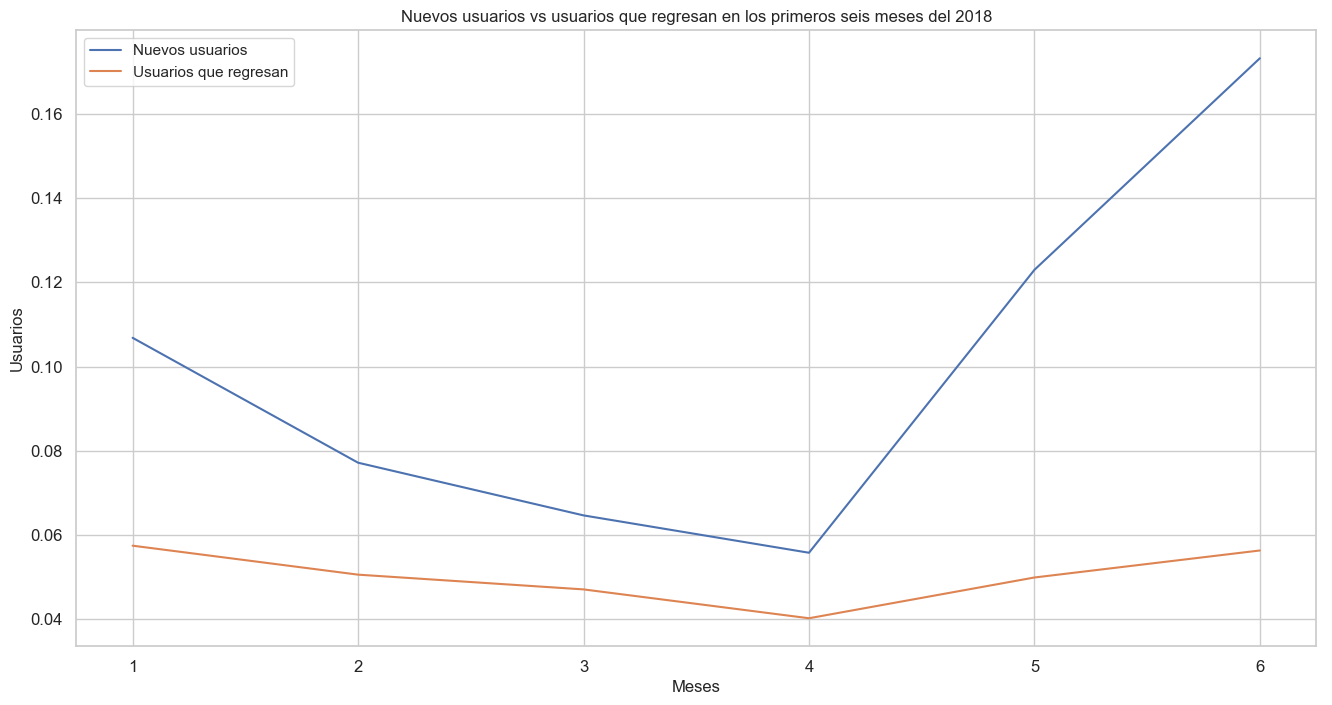

In [37]:
new_users.plot(kind = 'line', figsize = (16, 8), title = 'Nuevos usuarios vs usuarios que regresan en los primeros seis meses del 2018', legend = True, fontsize = 12)
ret_users.plot(kind = 'line', figsize = (16, 8), title = 'Nuevos usuarios vs usuarios que regresan en los primeros seis meses del 2018', legend = True, fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Meses",fontsize = 12)
ax.set_ylabel("Usuarios", fontsize = 12)